In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

(2710, 1676, 3)
(800, 1500, 3)


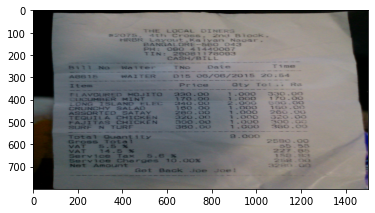

In [2]:
im_path = "./p.jpg"
#read image from path
img = cv2.imread(im_path)
print(img.shape)

#img resize
img = cv2.resize(img, (1500,800))
#BGR format : BGR->RGB
print(img.shape)

plt.imshow(img)
plt.show()

*remove the noise
*Edge Detection
*Coutour Extraction
*Best Counter Selection
*Project to the screen


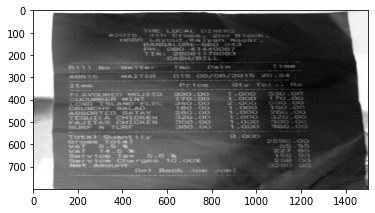

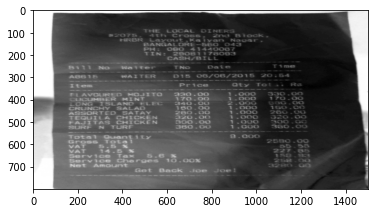

In [3]:
#Remove the Noise

##Image Blurring

orig = img.copy()
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray , cmap = 'binary')
plt.show()

blurred = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blurred, cmap = 'binary')
plt.show()

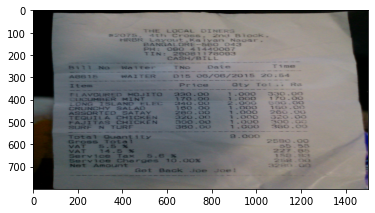

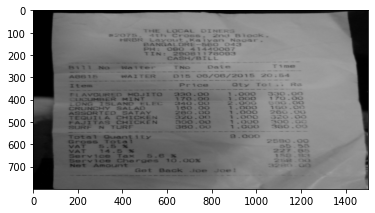

In [4]:
regen = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()


plt.imshow(regen)
plt.show()

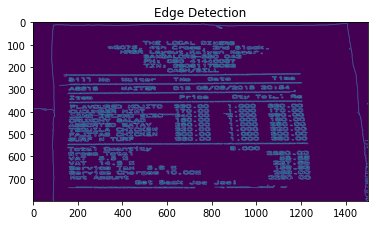

In [5]:
##Edge Detection

edge = cv2.Canny(blurred, 0,50)
orig_edge = edge.copy()

plt.imshow(orig_edge)
plt.title("Edge Detection")
plt.show()

In [6]:
##Countours Extraction

contours,_ = cv2.findContours(edge , cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

contours = sorted(contours, reverse=True, key=cv2.contourArea)

1812


In [7]:
#Select the best Contour Region
for c in contours:
  p = cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, 0.01*p, True)

  if len(approx) == 4:
    target = approx
    break

print (target.shape)  

(4, 1, 2)


In [8]:
##reorder target Contor

def reorder(h):
  h = h.reshape((4,2))
  print(h)

  hnew = np.zeros((4,2), dtype = np.float32)

  add = h.sum(axis = 1)
  hnew[3] = h[np.argmax(add)]
  hnew[1] = h[np.argmax(add)]

  diff = np.diff(h, axis = 1)
  hnew[0] = h[np.argmax(diff)]
  hnew[2] = h[np.argmax(diff)]

  return hnew
  

In [9]:
reorder = reorder(target)
print("*********")
print(reorder) 

[[159 547]
 [161 545]
 [240 546]
 [237 548]]
*********
[[159. 547.]
 [240. 546.]
 [159. 547.]
 [240. 546.]]


In [10]:
##Project to a fixed screen

input_representation  =reorder
output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [11]:
M = cv2.getPerspectiveTransform(input_representation, output_map)
ans = cv2.warpPerspective(orig, M, (800,800))

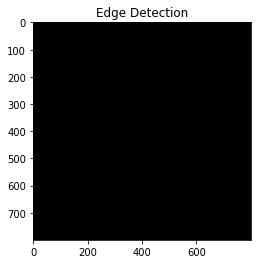

In [14]:
plt.imshow(ans)
plt.title("Edge Detection")
plt.show()

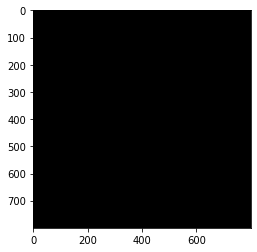

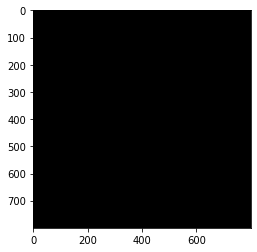

In [17]:
res = cv2.cvtColor(ans, cv2.COLOR_BGR2GRAY)

b_res = cv2.GaussianBlur(res, (3,3), 0)

plt.imshow(res, cmap = "gray")
plt.show()

plt.imshow(b_res, cmap = "gray")
plt.show()